In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\olive\Documents\GitHub\MilaClimateChangeHackathon2019\data\Final_Dataset.csv", index_col=0)

In [3]:
possible_targets = ['Number of Incidents', 'Implied vehicules', 'Serious injury',
       'Light injury', 'Total victims', 'Trucks and car', 'Heavy tractor',
       'Tool equipment', 'Bus', 'Bicycle', 'Moped', 'Motorcycle',
       'Emergency vehicule', 'Snowmobile', 'VHR', 'Other types',
       'Non-Precise vehicule', 'Pedestrian death', 'Pedestrian injury',
       'Pedestrian victims', 'Motorcycle death', 'Motorcycle injuries',
       'Motorcycle victims', 'Bicycle death', 'Bicycle injury',
       'Bicycle victims', 'Severity: Inferior damages',
       'Severity: Material damages', 'Severity: Serious injury',
       'Severity: Light injury', 'Severity: Death']

In [4]:
target = 'Number of Incidents'
targets = [*possible_targets]
targets.remove(target)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(possible_targets, axis=1), df[target], test_size=0.33)

In [6]:
model = LinearRegression()

In [7]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error

In [10]:
mean_absolute_error(y_test, y_pred)

2.179428471465386

In [11]:
for i in range(20):
    print(y_test.iloc[i], '\t', y_pred[i])

0.0 	 0.73468017578125
0.0 	 0.230377197265625
0.0 	 2.0208740234375
32.0 	 16.35577392578125
6.0 	 6.087554931640625
0.0 	 0.370513916015625
4.0 	 1.30462646484375
0.0 	 0.81732177734375
5.0 	 13.01171875
0.0 	 1.0281982421875
3.0 	 1.1778564453125
5.0 	 3.157440185546875
19.0 	 17.22369384765625
0.0 	 -0.34417724609375
1.0 	 0.155487060546875
2.0 	 1.219696044921875
0.0 	 1.265472412109375
7.0 	 6.5306396484375
1.0 	 2.71478271484375
0.0 	 1.499908447265625


In [12]:
res = dict()
for i in range(len(model.coef_)):
    res[X_train.columns[i]] = model.coef_[i]

In [13]:
res

{'pr_CNRM-CM5_historical_rcp26_(kg m-2 d-1)': 0.003966481390461727,
 'pr_CNRM-CM5_historical_rcp45_(kg m-2 d-1)': 0.00026957566473631865,
 'pr_CNRM-CM5_historical_rcp85_(kg m-2 d-1)': 0.013313072359916548,
 'pr_MIROC-ESM-CHEM_historical_rcp26_(kg m-2 d-1)': -0.0018522798785377283,
 'pr_MIROC-ESM-CHEM_historical_rcp45_(kg m-2 d-1)': -0.006727476770114535,
 'pr_MIROC-ESM-CHEM_historical_rcp85_(kg m-2 d-1)': 0.01537668799494909,
 'pr_MIROC-ESM_historical_rcp26_(kg m-2 d-1)': -0.005060031038096173,
 'pr_MIROC-ESM_historical_rcp45_(kg m-2 d-1)': 0.003316452531301949,
 'pr_MIROC-ESM_historical_rcp85_(kg m-2 d-1)': -0.003977856686265057,
 'pr_MRI-CGCM3_historical_rcp26_(kg m-2 d-1)': -0.00411022588057508,
 'pr_MRI-CGCM3_historical_rcp45_(kg m-2 d-1)': 0.002929766417463181,
 'pr_MRI-CGCM3_historical_rcp85_(kg m-2 d-1)': 0.004856403834498567,
 'GRID_45.458333155|-73.625002695': 189975249717.6305,
 'GRID_45.458333155|-73.70833602500002': 189975249707.4113,
 'GRID_45.458333155|-73.791669355': 189

In [14]:
import matplotlib.pyplot as plt

In [15]:
gds = [x for x in X_train.columns if 'GRID_' in x]

GRID_45.541666485|-73.875002685
49.16141392456268 55.884238901585654
13.675003301042215




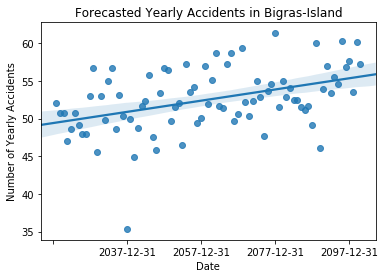

In [39]:
#data = []
#for GRID in gds:

#GRID = gds[14]
GRID = 'GRID_45.541666485|-73.875002685'

future_data = pd.DataFrame()
future_data = pd.read_csv(r"C:\Users\olive\Documents\GitHub\MilaClimateChangeHackathon2019\data\Future_Dataset_WithDates.csv", index_col=0, parse_dates=True)

future_data['Forecast'] = 0.0
future_data.loc[future_data[GRID]==1, 'Forecast'] = model.predict(future_data[future_data[GRID]==1].drop(['Forecast'], axis=1))

future_data = future_data.resample(rule='A').sum()

future_data = future_data.reset_index().sort_values('time')
future_data['date_f'] = pd.factorize(future_data['time'])[0] + 1
mapping = dict(zip(future_data['date_f'], future_data['time'].dt.date))

ax = None
ax = sns.regplot('date_f', 'Forecast', data=future_data)
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Yearly Accidents')
ax.set_xlabel('Date')
ax.set_title('Forecasted Yearly Accidents in Bigras-Island')

start = ax.get_lines()[0].get_ydata()[0]
end = ax.get_lines()[0].get_ydata()[-1]

data.append({'Grid': GRID, 'Start': start, 
             'End': end, 'Percent Change': 100*(end-start)/start})
print(GRID)
print(start, end)
print(100*(end-start)/start)
print('\n')
    
#data

In [17]:
pd.DataFrame(data)

,End,Grid,Percent Change,Start
0,4778.687365,GRID_45.458333155|-73.625002695,0.130663,4772.451549
1,4778.687365,GRID_45.458333155|-73.70833602500002,0.130663,4772.451549
2,4778.687365,GRID_45.458333155|-73.791669355,0.130663,4772.451549
3,4778.687365,GRID_45.458333155|-73.875002685,0.130663,4772.451549
4,4778.687365,GRID_45.458333155|-73.958336015,0.130663,4772.451549
5,4778.687365,GRID_45.541666485|-73.541669365,0.130663,4772.451549
6,4778.687365,GRID_45.541666485|-73.625002695,0.130663,4772.451549
7,4778.687365,GRID_45.541666485|-73.70833602500002,0.130663,4772.451549
8,4778.687365,GRID_45.541666485|-73.791669355,0.130663,4772.451549
9,4778.687365,GRID_45.541666485|-73.875002685,0.130663,4772.451549
